### 1.2 pytz 模块
- 实现全世界最重要的时区

In [125]:
import pytz

In [145]:
# dir(pytz.country_names)

In [150]:
print(pytz.country_names['US'])
print(pytz.country_timezones['BE'])
print()
pytz.common_timezones[-10:]

United States
['Europe/Brussels']



['Pacific/Wake',
 'Pacific/Wallis',
 'US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific',
 'UTC']

In [151]:
u.astimezone(pytz.timezone('CET'))

datetime.datetime(2017, 1, 10, 7, 53, 39, 931138, tzinfo=<DstTzInfo 'CET' CET+1:00:00 STD>)

In [152]:
u.astimezone(pytz.timezone('GMT'))

datetime.datetime(2017, 1, 10, 6, 53, 39, 931138, tzinfo=<StaticTzInfo 'GMT'>)

In [153]:
u.astimezone(pytz.timezone('US/Central'))

datetime.datetime(2017, 1, 10, 0, 53, 39, 931138, tzinfo=<DstTzInfo 'US/Central' CST-1 day, 18:00:00 STD>)

## 2 Numpy
- datetime64 类

In [ ]:
import numpy as np

In [155]:
nd = np.datetime64('2015-10-31')
nd

numpy.datetime64('2015-10-31')

In [157]:
np.datetime_as_string(nd) # 表示为字符串对象

'2015-10-31'

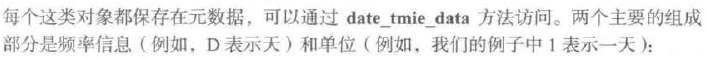

In [158]:
Image(filename="py35_picture\chap-datetime64.png")

In [159]:
np.datetime_data(nd)

('D', 1)

In [167]:
# datetime 对象 与 datetime64对象 互相转换
d = dt.datetime(2017,1,10,11,12,25,50000) 
print(type(d))
nd = np.datetime64(d)
print(type(nd))
print(type(nd.astype(dt.datetime)))

<class 'datetime.datetime'>
<class 'numpy.datetime64'>
<class 'datetime.datetime'>


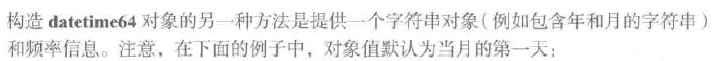

In [168]:
Image(filename="py35_picture\chap-datetime64-2.png")

In [171]:
nd = np.datetime64('2015-10','D')
print(nd)

np.datetime64('2015-10','D') == np.datetime64('2015-10-01')

2015-10-01


True

In [172]:
np.array(['2016-06-10','2017-07-10','2017-08-10'],dtype = 'datetime64')

array(['2016-06-10', '2017-07-10', '2017-08-10'], dtype='datetime64[D]')

In [173]:
np.array(['2016-06-10T12:00:00','2017-07-10T12:00:00','2017-08-10T12:00:00'],dtype = 'datetime64[s]')

array(['2016-06-10T12:00:00', '2017-07-10T12:00:00', '2017-08-10T12:00:00'], dtype='datetime64[s]')

In [174]:
# 日期范围
np.arange('2016-01-01','2016-01-04',dtype = 'datetime64') # day

array(['2016-01-01', '2016-01-02', '2016-01-03'], dtype='datetime64[D]')

In [175]:
np.arange('2016-01','2016-04',dtype = 'datetime64') # month

array(['2016-01', '2016-02', '2016-03'], dtype='datetime64[M]')

In [177]:
np.arange('2016-01-01','2016-10-01',dtype = 'datetime64[W]')[:10]

array(['2015-12-31', '2016-01-07', '2016-01-14', '2016-01-21',
       '2016-01-28', '2016-02-04', '2016-02-11', '2016-02-18',
       '2016-02-25', '2016-03-03'], dtype='datetime64[W]')

In [180]:
dt1 = np.arange('2016-06-10T12:00:00','2016-06-11T12:00:00',dtype = 'datetime64[h]') # hour
dt1[:10]

array(['2016-06-10T12', '2016-06-10T13', '2016-06-10T14', '2016-06-10T15',
       '2016-06-10T16', '2016-06-10T17', '2016-06-10T18', '2016-06-10T19',
       '2016-06-10T20', '2016-06-10T21'], dtype='datetime64[h]')

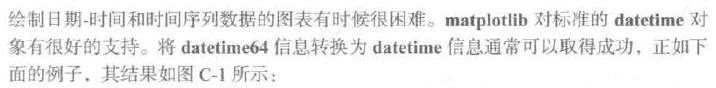

In [179]:
Image(filename="py35_picture\chap-datetime64-3.png")

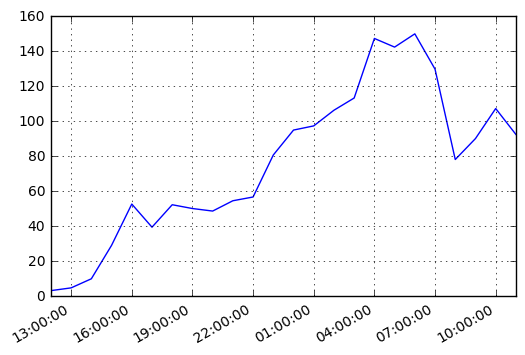

In [182]:
np.random.seed(0)
rnd = np.random.standard_normal(len(dt1)).cumsum() ** 2

fig = plt.figure()
plt.plot(dt1.astype(dt.datetime),rnd)
plt.grid(True)
fig.autofmt_xdate()

## 3 pandas
- DatetimeIndex 类

In [184]:
ts = pd.Timestamp('2016-06-30')
ts

Timestamp('2016-06-30 00:00:00')

In [195]:
# datetime 对象 与 Timestamp 对象 互相转换
d = ts.to_datetime()
print(type(d))
print(type(pd.Timestamp(d)))

print(type(nd))
print(type(pd.Timestamp(nd)))

<class 'datetime.datetime'>
<class 'pandas.tslib.Timestamp'>
<class 'numpy.datetime64'>
<class 'pandas.tslib.Timestamp'>


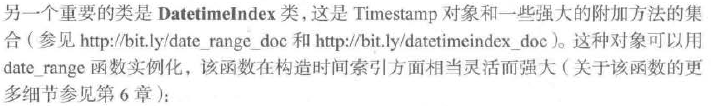

In [196]:
Image(filename="py35_picture\chap-DatetimeIndex.png")

In [198]:
dti = pd.date_range('2016/01/01',freq = 'M', periods = 12)
print(dti[6])
dti 

2016-07-31 00:00:00


DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [201]:
pdi = dti.to_pydatetime()
print(type(dti))
print(type(pdi))
pdi

<class 'pandas.tseries.index.DatetimeIndex'>
<class 'numpy.ndarray'>


array([datetime.datetime(2016, 1, 31, 0, 0),
       datetime.datetime(2016, 2, 29, 0, 0),
       datetime.datetime(2016, 3, 31, 0, 0),
       datetime.datetime(2016, 4, 30, 0, 0),
       datetime.datetime(2016, 5, 31, 0, 0),
       datetime.datetime(2016, 6, 30, 0, 0),
       datetime.datetime(2016, 7, 31, 0, 0),
       datetime.datetime(2016, 8, 31, 0, 0),
       datetime.datetime(2016, 9, 30, 0, 0),
       datetime.datetime(2016, 10, 31, 0, 0),
       datetime.datetime(2016, 11, 30, 0, 0),
       datetime.datetime(2016, 12, 31, 0, 0)], dtype=object)

In [202]:
pd.DatetimeIndex(pdi) # 反向操作

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq=None)

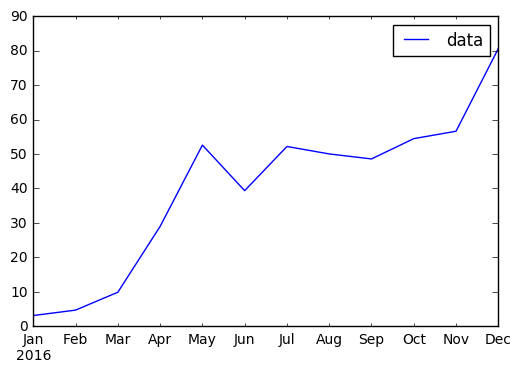

In [204]:
np.random.seed(0) # 绘制日期-时间信息对应的图表
rnd = np.random.standard_normal(len(dti)).cumsum() ** 2

df = pd.DataFrame(rnd,columns = ['data'], index = dti)
df.plot()

In [205]:
# pandas与pytz集成，管理时区
pd.date_range('2016/01/01',freq = 'M',periods=12,tz = pytz.timezone('CET'))

DatetimeIndex(['2016-01-31 00:00:00+01:00', '2016-02-29 00:00:00+01:00',
               '2016-03-31 00:00:00+02:00', '2016-04-30 00:00:00+02:00',
               '2016-05-31 00:00:00+02:00', '2016-06-30 00:00:00+02:00',
               '2016-07-31 00:00:00+02:00', '2016-08-31 00:00:00+02:00',
               '2016-09-30 00:00:00+02:00', '2016-10-31 00:00:00+01:00',
               '2016-11-30 00:00:00+01:00', '2016-12-31 00:00:00+01:00'],
              dtype='datetime64[ns, CET]', freq='M')

In [207]:
dti = pd.date_range('2016/01/01',freq = 'M',periods=12,tz = 'US/Eastern')
dti

DatetimeIndex(['2016-01-31 00:00:00-05:00', '2016-02-29 00:00:00-05:00',
               '2016-03-31 00:00:00-04:00', '2016-04-30 00:00:00-04:00',
               '2016-05-31 00:00:00-04:00', '2016-06-30 00:00:00-04:00',
               '2016-07-31 00:00:00-04:00', '2016-08-31 00:00:00-04:00',
               '2016-09-30 00:00:00-04:00', '2016-10-31 00:00:00-04:00',
               '2016-11-30 00:00:00-05:00', '2016-12-31 00:00:00-05:00'],
              dtype='datetime64[ns, US/Eastern]', freq='M')

In [208]:
dti.tz_convert("GMT") # 转换时区

DatetimeIndex(['2016-01-31 05:00:00+00:00', '2016-02-29 05:00:00+00:00',
               '2016-03-31 04:00:00+00:00', '2016-04-30 04:00:00+00:00',
               '2016-05-31 04:00:00+00:00', '2016-06-30 04:00:00+00:00',
               '2016-07-31 04:00:00+00:00', '2016-08-31 04:00:00+00:00',
               '2016-09-30 04:00:00+00:00', '2016-10-31 04:00:00+00:00',
               '2016-11-30 05:00:00+00:00', '2016-12-31 05:00:00+00:00'],
              dtype='datetime64[ns, GMT]', freq='M')